In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick ## Will allow plots to show as money 
import requests
from bs4 import BeautifulSoup
import re

In [2]:
## Read In Data - Metro Goverment Employee Earnings, Needs To Be Cleaned And Aggregated

In [3]:
metro_employee = pd.read_csv('data/metro_employee_earnings.csv')

C:\Users\kevin\AppData\Local\Temp\ipykernel_51152\1130600688.py:1: DtypeWarning: Columns (2,8) have mixed types. Specify dtype option on import or set low_memory=False.
  metro_employee = pd.read_csv('data/metro_employee_earnings.csv')


In [4]:
metro_employee

,OBJECTID,Employee Name,Home Business Unit,Job Class,Regular Pay,Overtime Pay,Supplemental Pay,Longevity,Bonuses,Payouts,Other Pay,Total Pay,Fiscal Year
0,1,"Barber, Kyle E",LIB Reference Services,Library Mgr 3,104683.26,NaN,7662.32,825.0,NaN,NaN,NaN,113170.58,2024
1,2,"Jackson, Bruce",MNPS McGavock High,Principal HS,130437.55,NaN,NaN,NaN,NaN,NaN,NaN,130437.55,2024
2,3,"Hall, Terry",MNPS School Audit,Mgr Audit,85896.21,NaN,NaN,NaN,NaN,NaN,NaN,85896.21,2024
3,4,"Rheinecker, Jennifer",MNPS Donelson Middle,Principal MS,135261.15,NaN,NaN,NaN,NaN,NaN,NaN,135261.15,2024
4,5,"Hester, James R",PAR Environmental Ed Prog,Parks & Recreation Asst Dir,151112.28,NaN,NaN,825.0,NaN,NaN,NaN,151937.28,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...
272626,272627,"Pickett, Matthew W",NaN,Admin Svcs Mgr,95635.39,NaN,NaN,275.0,NaN,NaN,NaN,95910.39,2024
272627,272628,"Simpkins, Deana A",NaN,Utility Field Tech 1,7160.03,NaN,190.00,NaN,NaN,NaN,NaN,7350.03,2024
272628,272629,"Neumaier, Anthony J",NaN,Water Svcs Asst Dir,99112.26,NaN,NaN,907.5,NaN,NaN,NaN,100019.76,2024
272629,272630,"Esaw, Michael Eugene",NaN,Utility Field Tech 1,8128.16,NaN,NaN,NaN,NaN,NaN,NaN,8128.16,2024


In [5]:
### Remove Uneeded Columns

In [6]:
metro_employee = metro_employee.drop(['OBJECTID','Employee Name','Overtime Pay','Supplemental Pay','Longevity','Bonuses','Payouts','Other Pay'], axis=1)

In [7]:
metro_employee

,Home Business Unit,Job Class,Regular Pay,Total Pay,Fiscal Year
0,LIB Reference Services,Library Mgr 3,104683.26,113170.58,2024
1,MNPS McGavock High,Principal HS,130437.55,130437.55,2024
2,MNPS School Audit,Mgr Audit,85896.21,85896.21,2024
3,MNPS Donelson Middle,Principal MS,135261.15,135261.15,2024
4,PAR Environmental Ed Prog,Parks & Recreation Asst Dir,151112.28,151937.28,2024
...,...,...,...,...,...
272626,NaN,Admin Svcs Mgr,95635.39,95910.39,2024
272627,NaN,Utility Field Tech 1,7160.03,7350.03,2024
272628,NaN,Water Svcs Asst Dir,99112.26,100019.76,2024
272629,NaN,Utility Field Tech 1,8128.16,8128.16,2024


In [8]:
metro_employee.describe()

,Regular Pay,Total Pay,Fiscal Year
count,267079.000000,271053.000000,272631.000000
mean,38065.633574,40179.554677,2019.764388
std,27968.826819,30006.456426,2.893049
min,-4986.080000,0.010000,2015.000000
25%,14076.690000,14014.960000,2017.000000
50%,39163.470000,40694.310000,2020.000000
75%,56444.140000,60145.040000,2022.000000
max,307754.400000,376713.000000,2024.000000


In [9]:
### Can See The Average Pay Among Empoloyees is 38,000 - 40,000

In [10]:
avg_pay = metro_employee.groupby('Home Business Unit')['Total Pay'].mean()

In [11]:
avg_pay

Home Business Unit
ADM Contrib Scholars Academy         24389.620000
ADM Election Day & EarlyVoting         807.265299
ADM NCAC Local Match                 29193.000000
ADM NCAC Nash Constr Readiness       43893.141538
ADM Poverty Adult Literacy Ini        8076.950000
                                         ...     
WS WM Household Hazardous Waste      38563.965000
WS WM Landfill Engineering           79903.566667
WS WM Metro Collection               28872.901633
WS WM Tire Program                   32975.740000
x - MNPS  K Twelve Administration     4121.992828
Name: Total Pay, Length: 1090, dtype: float64

In [12]:
avg_pay.reset_index()

,Home Business Unit,Total Pay
0,ADM Contrib Scholars Academy,24389.620000
1,ADM Election Day & EarlyVoting,807.265299
2,ADM NCAC Local Match,29193.000000
3,ADM NCAC Nash Constr Readiness,43893.141538
4,ADM Poverty Adult Literacy Ini,8076.950000
...,...,...
1085,WS WM Household Hazardous Waste,38563.965000
1086,WS WM Landfill Engineering,79903.566667
1087,WS WM Metro Collection,28872.901633
1088,WS WM Tire Program,32975.740000


In [ ]:
### Format Data To Years to Be Merged Later 

In [13]:
avg_pay = (
    metro_employee
      .groupby('Fiscal Year')['Total Pay']
      .mean()
      .reset_index(name='Average Pay')
)

In [14]:
avg_pay

,Fiscal Year,Average Pay
0,2015,36959.725111
1,2016,37446.584983
2,2017,39253.303130
3,2018,41135.317475
4,2019,40755.315815
5,2020,38432.211657
6,2021,40816.307533
7,2022,41242.822739
8,2023,38461.464908
9,2024,45786.830431


In [15]:
avg_pay.columns = ['Year', 'Average Pay']

In [16]:
avg_pay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         10 non-null     int64  
 1   Average Pay  10 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 292.0 bytes


In [17]:
avg_pay

,Year,Average Pay
0,2015,36959.725111
1,2016,37446.584983
2,2017,39253.303130
3,2018,41135.317475
4,2019,40755.315815
5,2020,38432.211657
6,2021,40816.307533
7,2022,41242.822739
8,2023,38461.464908
9,2024,45786.830431


In [ ]:
### Plot Line Graph to Show Changes Over Years

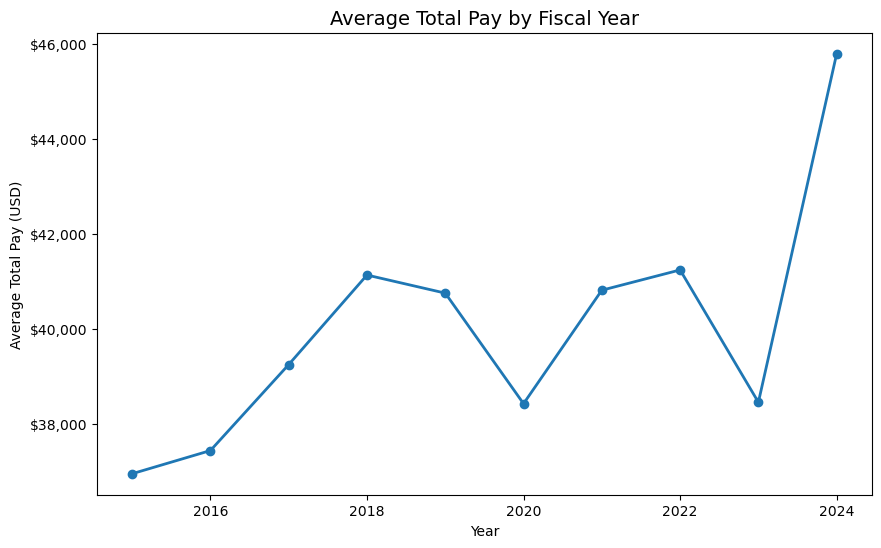

In [18]:
plt.figure(figsize=(10,6))
plt.plot(
    avg_pay['Year'],
    avg_pay['Average Pay'],
    marker='o',
    linewidth=2,
    label='Avg Total Pay'
)
plt.title('Average Total Pay by Fiscal Year', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Average Total Pay (USD)')
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

In [19]:
### Homeowned Data From Zillow That Shows The Income to Be Able to Buy A House 

In [20]:
zillow_income = pd.read_csv('data/zillow_income_needed.csv')

In [21]:
zillow_income

,RegionID,SizeRank,RegionName,RegionType,StateName,1/31/2012,2/29/2012,3/31/2012,4/30/2012,5/31/2012,...,7/31/2024,8/31/2024,9/30/2024,10/31/2024,11/30/2024,12/31/2024,1/31/2025,2/28/2025,3/31/2025,4/30/2025
0,102001,0,United States,country,NaN,37514.113879,37443.974034,37686.713888,37641.907614,37413.529554,...,98467.282352,95840.416918,93779.944878,95821.967036,98871.966533,98355.997911,100427.609199,99646.819920,98085.314200,98536.573449
1,394913,1,"New York, NY",msa,NY,97688.491502,97306.167835,97747.730807,97577.626017,97018.512671,...,195278.286116,191301.601012,188134.118976,192670.409661,198977.491274,198151.970870,202075.365058,200727.353001,198356.800177,200152.110766
2,753899,2,"Los Angeles, CA",msa,CA,77696.296562,77206.703066,77145.425660,76383.100485,75398.962398,...,246491.002381,240651.204866,235985.685410,242358.309633,251376.382859,250505.217406,255806.156630,252837.175670,247505.189098,247982.355686
3,394463,3,"Chicago, IL",msa,IL,47642.634558,47224.341149,47225.460644,46903.370749,46402.138131,...,88894.340811,86701.238036,84981.130200,86944.609519,89866.945796,89551.908393,91642.471500,91171.151765,90021.166958,90714.043940
4,394514,4,"Dallas, TX",msa,TX,39044.415464,39019.173250,39306.138130,39344.994704,39185.857253,...,112077.878328,109054.868987,106812.618797,108785.040987,111783.967242,110905.865127,112757.125471,111606.520223,109655.123302,109683.655655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,394787,518,"Lewiston, ID",msa,ID,35818.799372,35798.165191,36144.763497,36232.086748,36118.531668,...,95337.320430,92681.564304,90472.717544,92546.342603,95735.715194,95498.209970,97833.896615,97277.521329,95827.340220,96535.766180
386,394570,523,"Enid, OK",msa,OK,20237.112544,20271.369585,20485.429181,20496.358475,20401.087633,...,41040.525385,40139.338959,39647.964274,40467.716804,41690.329375,41625.297505,42493.681772,42264.844368,41778.889590,41984.415159
387,395199,525,"Walla Walla, WA",msa,WA,39560.658616,39503.001400,39786.754109,39759.234168,39452.271259,...,107654.850859,104709.384957,102447.757773,104909.524350,108485.981479,108164.645222,110641.931882,109916.276506,108264.130319,109133.115701
388,394444,551,"Carson City, NV",msa,NV,31678.712688,31621.162478,31848.853743,31862.461063,31701.898369,...,119811.344901,116386.816196,113446.678049,116156.806909,120431.079494,120020.744100,123108.829236,122291.430289,120507.353957,121337.165770


In [ ]:
### Filter to Nashville and Save Dataframe

In [22]:
nash = zillow_income.loc[zillow_income.RegionName == 'Nashville, TN']

In [158]:
nash

,RegionID,SizeRank,RegionName,RegionType,StateName,1/31/2012,2/29/2012,3/31/2012,4/30/2012,5/31/2012,...,7/31/2024,8/31/2024,9/30/2024,10/31/2024,11/30/2024,12/31/2024,1/31/2025,2/28/2025,3/31/2025,4/30/2025
36,394902,37,"Nashville, TN",msa,TN,36864.445513,36809.745565,37068.373401,37019.60984,36741.4863,...,116829.959637,113372.5145,110575.027516,112979.753725,116722.186309,116022.639343,118656.250283,117704.54127,115846.233724,116492.554201


In [23]:
print(nash.columns)
print(nash.head())

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       '1/31/2012', '2/29/2012', '3/31/2012', '4/30/2012', '5/31/2012',
       ...
       '7/31/2024', '8/31/2024', '9/30/2024', '10/31/2024', '11/30/2024',
       '12/31/2024', '1/31/2025', '2/28/2025', '3/31/2025', '4/30/2025'],
      dtype='object', length=165)
    RegionID  SizeRank     RegionName RegionType StateName     1/31/2012  \
36    394902        37  Nashville, TN        msa        TN  36864.445513   

       2/29/2012     3/31/2012    4/30/2012   5/31/2012  ...      7/31/2024  \
36  36809.745565  37068.373401  37019.60984  36741.4863  ...  116829.959637   

      8/31/2024      9/30/2024     10/31/2024     11/30/2024     12/31/2024  \
36  113372.5145  110575.027516  112979.753725  116722.186309  116022.639343   

        1/31/2025     2/28/2025      3/31/2025      4/30/2025  
36  118656.250283  117704.54127  115846.233724  116492.554201  

[1 rows x 165 columns]


In [24]:
id_cols = ['RegionName'] 

In [ ]:
### Format to Have info in columns, make date column into pandas. 

In [25]:
nashville = nash.melt(id_vars=id_cols, var_name='Date', value_name='Income_Needed')
nashville['Date'] = pd.to_datetime(nashville['Date'], errors='coerce')

C:\Users\kevin\AppData\Local\Temp\ipykernel_51152\836736618.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  nashville['Date'] = pd.to_datetime(nashville['Date'], errors='coerce')


In [26]:
nashville

,RegionName,Date,Income_Needed
0,"Nashville, TN",NaT,394902
1,"Nashville, TN",NaT,37
2,"Nashville, TN",NaT,msa
3,"Nashville, TN",NaT,TN
4,"Nashville, TN",2012-01-31,36864.445513
...,...,...,...
159,"Nashville, TN",2024-12-31,116022.639343
160,"Nashville, TN",2025-01-31,118656.250283
161,"Nashville, TN",2025-02-28,117704.54127
162,"Nashville, TN",2025-03-31,115846.233724


In [ ]:
### Drop the first 4 rows uneeded 

In [27]:
nashville = nashville.iloc[4:].reset_index(drop=True)


In [28]:
nashville

,RegionName,Date,Income_Needed
0,"Nashville, TN",2012-01-31,36864.445513
1,"Nashville, TN",2012-02-29,36809.745565
2,"Nashville, TN",2012-03-31,37068.373401
3,"Nashville, TN",2012-04-30,37019.60984
4,"Nashville, TN",2012-05-31,36741.4863
...,...,...,...
155,"Nashville, TN",2024-12-31,116022.639343
156,"Nashville, TN",2025-01-31,118656.250283
157,"Nashville, TN",2025-02-28,117704.54127
158,"Nashville, TN",2025-03-31,115846.233724


In [29]:
# To only keep data from 2015 onward:
nashville = nashville[nashville['Date'] >= '2015-01-01'].reset_index(drop=True)


In [30]:
nashville['Year'] = nashville['Date'].dt.year

In [ ]:
### Format to fit nash dataframe

In [31]:
nashville = (
    nashville.groupby('Year')['Income_Needed']
    .mean()
    .reset_index()
    .rename(columns={'Income_Needed': 'Avg_Income_Needed'})
)


In [32]:
nashville

,Year,Avg_Income_Needed
0,2015,45257.981646
1,2016,48632.208621
2,2017,54559.735344
3,2018,61461.31437
4,2019,60374.228341
5,2020,59819.796948
6,2021,66775.745872
7,2022,100170.373794
8,2023,114054.513288
9,2024,115349.519991


In [33]:
nashville

,Year,Avg_Income_Needed
0,2015,45257.981646
1,2016,48632.208621
2,2017,54559.735344
3,2018,61461.31437
4,2019,60374.228341
5,2020,59819.796948
6,2021,66775.745872
7,2022,100170.373794
8,2023,114054.513288
9,2024,115349.519991


In [ ]:
### Plot into Line chart

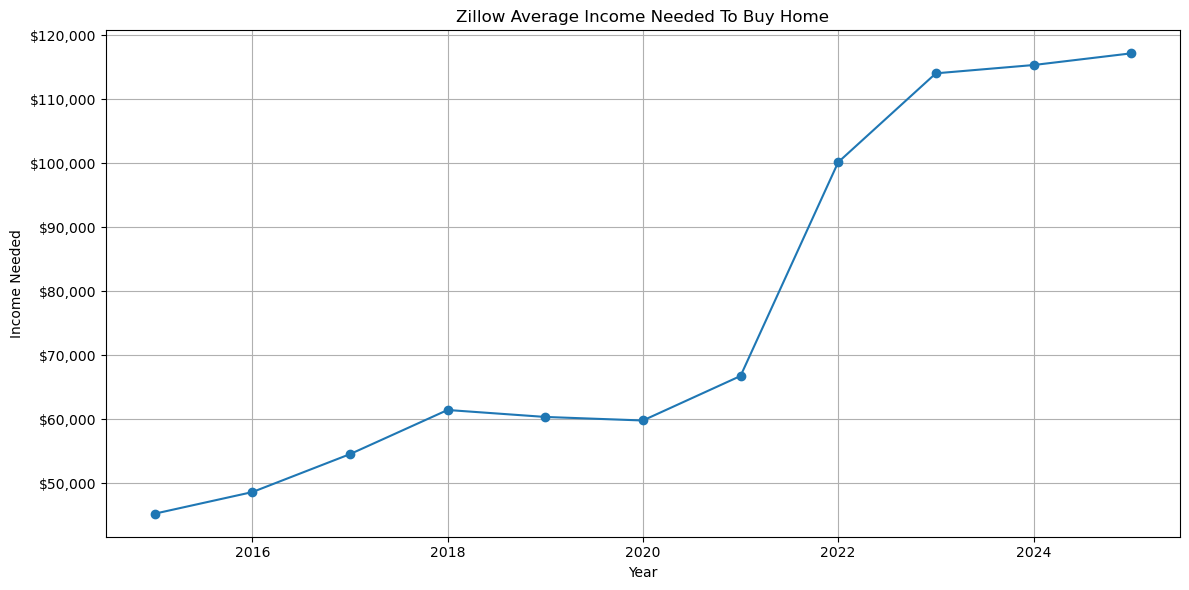

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(nashville['Year'], nashville['Avg_Income_Needed'], marker='o')

plt.title("Zillow Average Income Needed To Buy Home", fontsize=12)
plt.xlabel("Year")
plt.ylabel("Income Needed")
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
plt.grid(True)
plt.tight_layout()

In [35]:
### Webscrape Intrest Rates From FHA Website

In [36]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# FHFA Interest Rates Page
url = 'https://www.fhfa.gov/DataTools/Downloads/Pages/Monthly-Interest-Rate-Data.aspx'
headers = {'User-Agent': 'Mozilla/5.0'}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, 'html.parser')

# Inspect the table structure and extract rows
tables = soup.find_all('table')

if tables:
    interest = pd.read_html(str(tables[0]))[0]  # Reads the first table
    print(interest.head())
else:
    print("")

  MIRS Transition Index Release Dates Index Value
0                            May 2025        6.64
1                          April 2025        6.88
2                          March 2025        6.92
3                       February 2025        6.59
4                        January 2025        6.77


C:\Users\kevin\AppData\Local\Temp\ipykernel_51152\4016495636.py:16: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  interest = pd.read_html(str(tables[0]))[0]  # Reads the first table


In [37]:
interest

,MIRS Transition Index Release Dates,Index Value
0,May 2025,6.64
1,April 2025,6.88
2,March 2025,6.92
3,February 2025,6.59
4,January 2025,6.77
5,December 2024,6.31
6,November 2024,6.19
7,October 2024,6.48
8,September 2024,6.88
9,August 2024,6.94


In [38]:
### Rename Columns

In [39]:
interest.columns = ['Date','Interest Rate']

In [40]:
interest

,Date,Interest Rate
0,May 2025,6.64
1,April 2025,6.88
2,March 2025,6.92
3,February 2025,6.59
4,January 2025,6.77
5,December 2024,6.31
6,November 2024,6.19
7,October 2024,6.48
8,September 2024,6.88
9,August 2024,6.94


In [41]:
interest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           41 non-null     object
 1   Interest Rate  41 non-null     object
dtypes: object(2)
memory usage: 788.0+ bytes


In [42]:
interest

,Date,Interest Rate
0,May 2025,6.64
1,April 2025,6.88
2,March 2025,6.92
3,February 2025,6.59
4,January 2025,6.77
5,December 2024,6.31
6,November 2024,6.19
7,October 2024,6.48
8,September 2024,6.88
9,August 2024,6.94


In [43]:
## Need To Change Data Types To Covert to Float and DateTime ( And remove extra spaces)

In [44]:
import re

# Clean both columns
def clean_text(x):
    return re.sub(r'[^\x00-\x7F]+', '', str(x)).replace('*', '').strip()

interest['Date'] = interest['Date'].apply(clean_text)
interest['Interest Rate'] = interest['Interest Rate'].apply(clean_text)

# Remove any footnotes or extra non-numeric text
interest['Interest Rate'] = interest['Interest Rate'].str.extract(r'([\d.]+)').astype(float)

# Convert Date to datetime
interest['Date'] = pd.to_datetime(interest['Date'], format='%B %Y')


In [45]:
interest

,Date,Interest Rate
0,2025-05-01,6.64
1,2025-04-01,6.88
2,2025-03-01,6.92
3,2025-02-01,6.59
4,2025-01-01,6.77
5,2024-12-01,6.31
6,2024-11-01,6.19
7,2024-10-01,6.48
8,2024-09-01,6.88
9,2024-08-01,6.94


In [46]:
interest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           41 non-null     datetime64[ns]
 1   Interest Rate  41 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 788.0 bytes


In [47]:
### Make a Percent Column

In [48]:
interest['Interest Rate (%)'] = interest['Interest Rate'].map(lambda x: f"{x:.2f}%")


In [49]:
interest

,Date,Interest Rate,Interest Rate (%)
0,2025-05-01,6.64,6.64%
1,2025-04-01,6.88,6.88%
2,2025-03-01,6.92,6.92%
3,2025-02-01,6.59,6.59%
4,2025-01-01,6.77,6.77%
5,2024-12-01,6.31,6.31%
6,2024-11-01,6.19,6.19%
7,2024-10-01,6.48,6.48%
8,2024-09-01,6.88,6.88%
9,2024-08-01,6.94,6.94%


In [ ]:
### Save as csv file to use for dashboard

In [156]:
interest.to_csv('interest_rates_data.csv', index=False)

In [50]:
### Plot Interest Rate to Show Trend over the Years

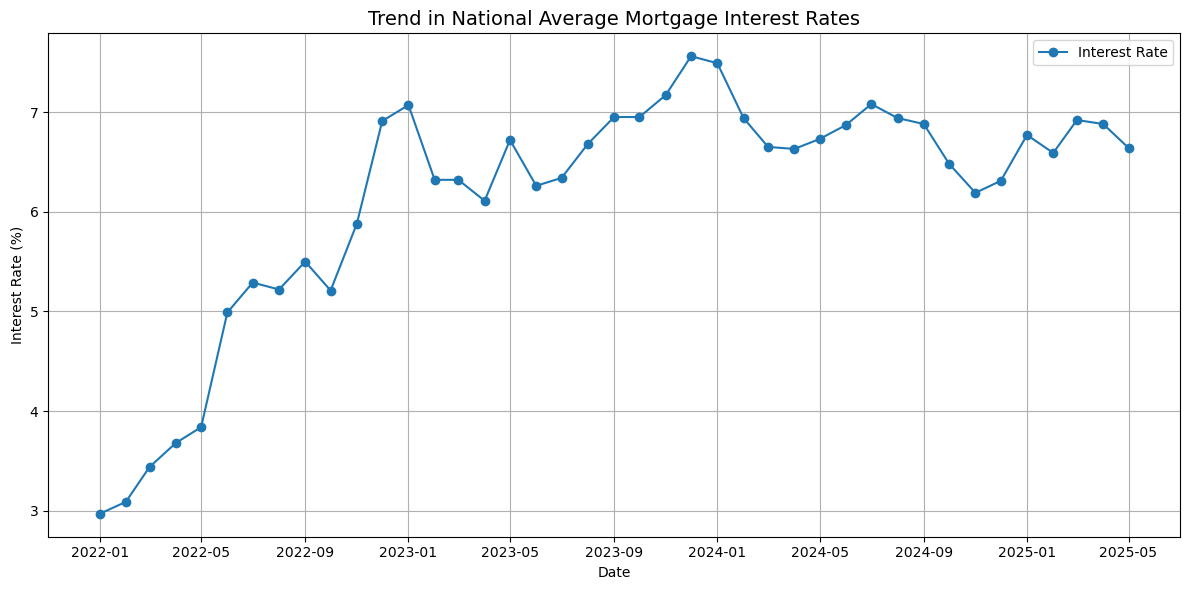

In [51]:
plt.figure(figsize=(12, 6))
plt.plot(interest['Date'], interest['Interest Rate'], marker='o', label='Interest Rate')

plt.title("Trend in National Average Mortgage Interest Rates", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Interest Rate (%)")
plt.grid(True)
plt.legend()
plt.tight_layout()

In [52]:
### Merge The Two Data Frames 

In [53]:
# Merge the two DataFrames on 'Year'
merged = nashville.merge(avg_pay, on='Year', how='inner')

print(merged)


   Year Avg_Income_Needed   Average Pay
0  2015      45257.981646  36959.725111
1  2016      48632.208621  37446.584983
2  2017      54559.735344  39253.303130
3  2018       61461.31437  41135.317475
4  2019      60374.228341  40755.315815
5  2020      59819.796948  38432.211657
6  2021      66775.745872  40816.307533
7  2022     100170.373794  41242.822739
8  2023     114054.513288  38461.464908
9  2024     115349.519991  45786.830431


In [54]:
merged

,Year,Avg_Income_Needed,Average Pay
0,2015,45257.981646,36959.725111
1,2016,48632.208621,37446.584983
2,2017,54559.735344,39253.303130
3,2018,61461.31437,41135.317475
4,2019,60374.228341,40755.315815
5,2020,59819.796948,38432.211657
6,2021,66775.745872,40816.307533
7,2022,100170.373794,41242.822739
8,2023,114054.513288,38461.464908
9,2024,115349.519991,45786.830431


In [ ]:
### Subtract Income From Needed Income

In [55]:
merged['Income Gap'] = merged['Average Pay'] - merged['Avg_Income_Needed']

In [56]:
merged

,Year,Avg_Income_Needed,Average Pay,Income Gap
0,2015,45257.981646,36959.725111,-8298.256535
1,2016,48632.208621,37446.584983,-11185.623638
2,2017,54559.735344,39253.303130,-15306.432214
3,2018,61461.31437,41135.317475,-20325.996895
4,2019,60374.228341,40755.315815,-19618.912526
5,2020,59819.796948,38432.211657,-21387.585291
6,2021,66775.745872,40816.307533,-25959.43834
7,2022,100170.373794,41242.822739,-58927.551055
8,2023,114054.513288,38461.464908,-75593.04838
9,2024,115349.519991,45786.830431,-69562.68956


In [ ]:
### PLot the 3 DataFrames to visualize the difference

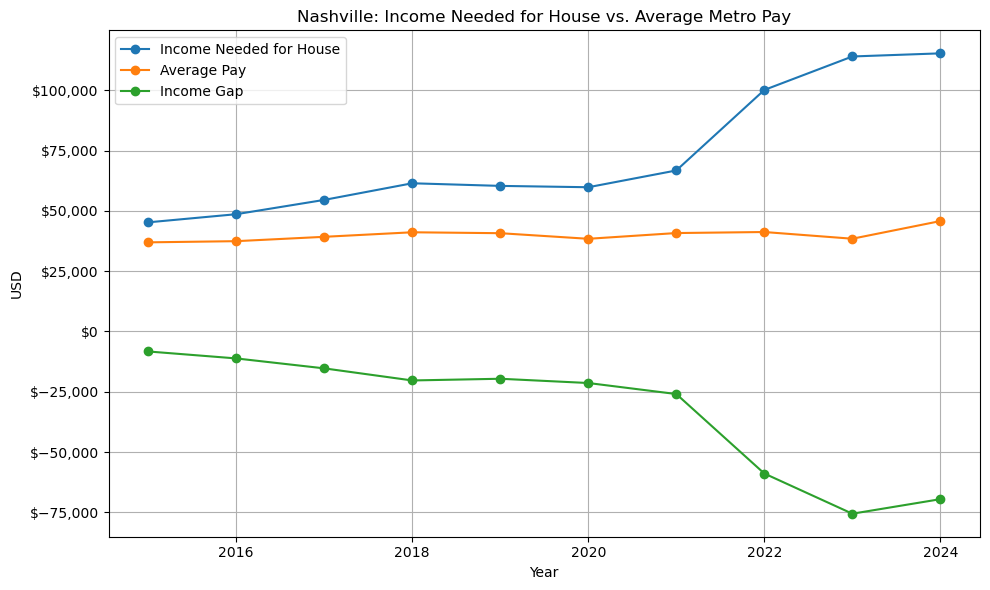

In [57]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

plt.figure(figsize=(10,6))
plt.plot(merged['Year'], merged['Avg_Income_Needed'], marker='o', label='Income Needed for House')
plt.plot(merged['Year'], merged['Average Pay'], marker='o', label='Average Pay')
plt.plot(merged['Year'], merged['Income Gap'], marker='o', label='Income Gap')

plt.title('Nashville: Income Needed for House vs. Average Metro Pay')
plt.xlabel('Year')
plt.ylabel('USD')
plt.legend()
plt.grid(True)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
plt.tight_layout()


In [58]:
### Api Key from census.gov
API_KEY = '7b52bc782a9c124b966feb0ddbb3d441e10f2ba9'
acs_url = (
    'https://api.census.gov/data/2022/acs/acs1'
    '?get=NAME,B19013_001E'
    '&for=county:037&in=state:47'
    f'&key={API_KEY}'
)
resp = requests.get(acs_url)
data = resp.json()
acs_df = pd.DataFrame(data[1:], columns=data[0])
acs_df['Median Household Income'] = acs_df['B19013_001E'].astype(float)
print(acs_df)


                         NAME B19013_001E state county  \
0  Davidson County, Tennessee       72473    47    037   

   Median Household Income  
0                  72473.0  


In [59]:
acs_df

,NAME,B19013_001E,state,county,Median Household Income
0,"Davidson County, Tennessee",72473,47,037,72473.0


In [60]:
# Read in CPI(Consumer Price Index) CSV
cpi = pd.read_csv('data/CPIAUCSL.csv')



In [61]:
cpi

,observation_date,CPIAUCSL
0,2015-05-01,237.001
1,2015-06-01,237.657
2,2015-07-01,238.034
3,2015-08-01,238.033
4,2015-09-01,237.498
...,...,...
116,2025-01-01,319.086
117,2025-02-01,319.775
118,2025-03-01,319.615
119,2025-04-01,320.321


In [62]:
# Convert DATE column to datetime
cpi['observation_date'] = pd.to_datetime(cpi['observation_date'])
cpi['Year'] = cpi['observation_date'].dt.year

# Compute annual average CPI
cpi_annual = cpi.groupby('Year')['CPIAUCSL'].mean().reset_index()

# Compute inflation rate year-over-year
cpi_annual['CPI Change (%)'] = cpi_annual['CPIAUCSL'].pct_change() * 100

print(cpi_annual.tail(10))


    Year    CPIAUCSL  CPI Change (%)
1   2016  240.005417        0.962770
2   2017  245.121000        2.131445
3   2018  251.099500        2.439000
4   2019  255.652583        1.813259
5   2020  258.855750        1.252937
6   2021  270.967917        4.679118
7   2022  292.625417        7.992644
8   2023  304.704167        4.127717
9   2024  313.697833        2.951606
10  2025  319.875400        1.969273


In [63]:
cpi_annual

,Year,CPIAUCSL,CPI Change (%)
0,2015,237.716750,NaN
1,2016,240.005417,0.962770
2,2017,245.121000,2.131445
3,2018,251.099500,2.439000
4,2019,255.652583,1.813259
5,2020,258.855750,1.252937
6,2021,270.967917,4.679118
7,2022,292.625417,7.992644
8,2023,304.704167,4.127717
9,2024,313.697833,2.951606


In [64]:
# Merge on 'Year'
merged = merged.merge(cpi_annual[['Year', 'CPIAUCSL','CPI Change (%)']], on='Year', how='left')


In [65]:
merged

,Year,Avg_Income_Needed,Average Pay,Income Gap,CPIAUCSL,CPI Change (%)
0,2015,45257.981646,36959.725111,-8298.256535,237.716750,NaN
1,2016,48632.208621,37446.584983,-11185.623638,240.005417,0.962770
2,2017,54559.735344,39253.303130,-15306.432214,245.121000,2.131445
3,2018,61461.31437,41135.317475,-20325.996895,251.099500,2.439000
4,2019,60374.228341,40755.315815,-19618.912526,255.652583,1.813259
5,2020,59819.796948,38432.211657,-21387.585291,258.855750,1.252937
6,2021,66775.745872,40816.307533,-25959.43834,270.967917,4.679118
7,2022,100170.373794,41242.822739,-58927.551055,292.625417,7.992644
8,2023,114054.513288,38461.464908,-75593.04838,304.704167,4.127717
9,2024,115349.519991,45786.830431,-69562.68956,313.697833,2.951606


In [ ]:
### Need more census data to match years with other data

In [140]:
api_key = '7b52bc782a9c124b966feb0ddbb3d441e10f2ba9'

# Years you want 
years = list(range(2015, 2024 + 1))  # 2015–2024
county_code = '037'  # Davidson County
state_code = '47'    # Tennessee

records = []

for year in years:
    url = (
        f'https://api.census.gov/data/{year}/acs/acs1'
        f'?get=NAME,B19013_001E&for=county:{county_code}&in=state:{state_code}&key={api_key}'
    )
    resp = requests.get(url)
    if resp.status_code == 200:
        data = resp.json()
        if len(data) > 1:
            try:
                value = float(data[1][1])
            except:
                value = None
            records.append({'Year': year, 'Median_Household_Income': value})
        else:
            records.append({'Year': year, 'Median_Household_Income': None})
    else:
        print(f"Year {year}: Error {resp.status_code}")
        records.append({'Year': year, 'Median_Household_Income': None})

# Build DataFrame
income_df = pd.DataFrame(records)
print(income_df)

Year 2020: Error 404
Year 2024: Error 404
   Year  Median_Household_Income
0  2015                  52026.0
1  2016                  54855.0
2  2017                  58490.0
3  2018                  60856.0
4  2019                  63938.0
5  2020                      NaN
6  2021                  65348.0
7  2022                  72473.0
8  2023                  80379.0
9  2024                      NaN


In [142]:
# Merge to other dataframe
merged = merged.merge(income_df, on='Year', how='left')


print(merged)


   Year Avg_Income_Needed   Average Pay    Income Gap    CPIAUCSL  \
0  2015      45257.981646  36959.725111  -8298.256535  237.716750   
1  2016      48632.208621  37446.584983 -11185.623638  240.005417   
2  2017      54559.735344  39253.303130 -15306.432214  245.121000   
3  2018       61461.31437  41135.317475 -20325.996895  251.099500   
4  2019      60374.228341  40755.315815 -19618.912526  255.652583   
5  2020      59819.796948  38432.211657 -21387.585291  258.855750   
6  2021      66775.745872  40816.307533  -25959.43834  270.967917   
7  2022     100170.373794  41242.822739 -58927.551055  292.625417   
8  2023     114054.513288  38461.464908  -75593.04838  304.704167   
9  2024     115349.519991  45786.830431  -69562.68956  313.697833   

   CPI Change (%)  Median_Household_Income  
0             NaN                  52026.0  
1        0.962770                  54855.0  
2        2.131445                  58490.0  
3        2.439000                  60856.0  
4        1.8132

In [144]:
merged

,Year,Avg_Income_Needed,Average Pay,Income Gap,CPIAUCSL,CPI Change (%),Median_Household_Income
0,2015,45257.981646,36959.725111,-8298.256535,237.716750,NaN,52026.0
1,2016,48632.208621,37446.584983,-11185.623638,240.005417,0.962770,54855.0
2,2017,54559.735344,39253.303130,-15306.432214,245.121000,2.131445,58490.0
3,2018,61461.31437,41135.317475,-20325.996895,251.099500,2.439000,60856.0
4,2019,60374.228341,40755.315815,-19618.912526,255.652583,1.813259,63938.0
5,2020,59819.796948,38432.211657,-21387.585291,258.855750,1.252937,NaN
6,2021,66775.745872,40816.307533,-25959.43834,270.967917,4.679118,65348.0
7,2022,100170.373794,41242.822739,-58927.551055,292.625417,7.992644,72473.0
8,2023,114054.513288,38461.464908,-75593.04838,304.704167,4.127717,80379.0
9,2024,115349.519991,45786.830431,-69562.68956,313.697833,2.951606,NaN


In [ ]:
### Household income paygap

In [146]:
merged['HHI_Gap'] = merged['Median_Household_Income'] - merged['Avg_Income_Needed']

In [148]:
merged

,Year,Avg_Income_Needed,Average Pay,Income Gap,CPIAUCSL,CPI Change (%),Median_Household_Income,HHI_Gap
0,2015,45257.981646,36959.725111,-8298.256535,237.716750,NaN,52026.0,6768.018354
1,2016,48632.208621,37446.584983,-11185.623638,240.005417,0.962770,54855.0,6222.791379
2,2017,54559.735344,39253.303130,-15306.432214,245.121000,2.131445,58490.0,3930.264656
3,2018,61461.31437,41135.317475,-20325.996895,251.099500,2.439000,60856.0,-605.31437
4,2019,60374.228341,40755.315815,-19618.912526,255.652583,1.813259,63938.0,3563.771659
5,2020,59819.796948,38432.211657,-21387.585291,258.855750,1.252937,NaN,NaN
6,2021,66775.745872,40816.307533,-25959.43834,270.967917,4.679118,65348.0,-1427.745872
7,2022,100170.373794,41242.822739,-58927.551055,292.625417,7.992644,72473.0,-27697.373794
8,2023,114054.513288,38461.464908,-75593.04838,304.704167,4.127717,80379.0,-33675.513288
9,2024,115349.519991,45786.830431,-69562.68956,313.697833,2.951606,NaN,NaN


In [ ]:
### Drop Income Gap column the HHI_Gap column is more accurate

In [150]:
merged = merged.drop('Income Gap', axis=1)


In [152]:
merged

,Year,Avg_Income_Needed,Average Pay,CPIAUCSL,CPI Change (%),Median_Household_Income,HHI_Gap
0,2015,45257.981646,36959.725111,237.716750,NaN,52026.0,6768.018354
1,2016,48632.208621,37446.584983,240.005417,0.962770,54855.0,6222.791379
2,2017,54559.735344,39253.303130,245.121000,2.131445,58490.0,3930.264656
3,2018,61461.31437,41135.317475,251.099500,2.439000,60856.0,-605.31437
4,2019,60374.228341,40755.315815,255.652583,1.813259,63938.0,3563.771659
5,2020,59819.796948,38432.211657,258.855750,1.252937,NaN,NaN
6,2021,66775.745872,40816.307533,270.967917,4.679118,65348.0,-1427.745872
7,2022,100170.373794,41242.822739,292.625417,7.992644,72473.0,-27697.373794
8,2023,114054.513288,38461.464908,304.704167,4.127717,80379.0,-33675.513288
9,2024,115349.519991,45786.830431,313.697833,2.951606,NaN,NaN


In [ ]:
### Save CSV

In [154]:
merged.to_csv('capstone_final_data.csv', index=False)
